In [13]:
from __future__ import division
%matplotlib inline
import numpy as np,  matplotlib.pyplot as plt, sys
from time import time
from pylab import plot, show, legend
sys.path.append('/home/postdoc/dsen/Desktop/alphaSMC')
from PF import *
sys.path.append('/home/postdoc/dsen/Desktop/alphaSMC/OU_model')
from OU import *
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [14]:
x_0 = np.asarray([0])
theta = [0.5, 1, 1, 0.2, 1]
T = 250
y, X = simulate_data_OU(theta, x_0, T)
data = dict(x_0=x_0, y=y)
def test_fn(x) : return x
propagate, potential = propagate_OU, potential_OU

0.1 seconds


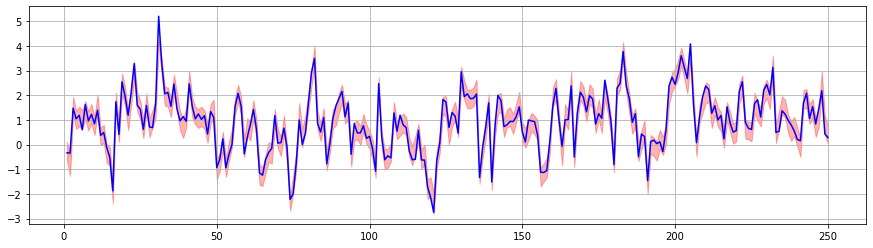

In [10]:
N = 1_000
start = time()
logNC_bpf, _, particles_bpf = bootstrap_PF(data, theta, potential, propagate, test_fn, N, store_paths=True)
print(round(time() - start, 1), "seconds")
plt.rcParams['figure.figsize'] = (15.0, 4.0)
CI = np.percentile(particles_bpf[:,:T,0],q=[2.5,97.5],axis=0)
plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
plt.grid(True)
plt.plot(np.arange(1,T+1), X[1:], "blue");

### AIRPF:

In [4]:
S = 10
A = [[]]*S
for s in range(S) :
    A[s] = scipy.sparse.lil_matrix(np.kron(np.kron(np.eye(2**(S-(s+1))),np.ones((2,2))/2),np.eye(2**s)))

31.3 seconds


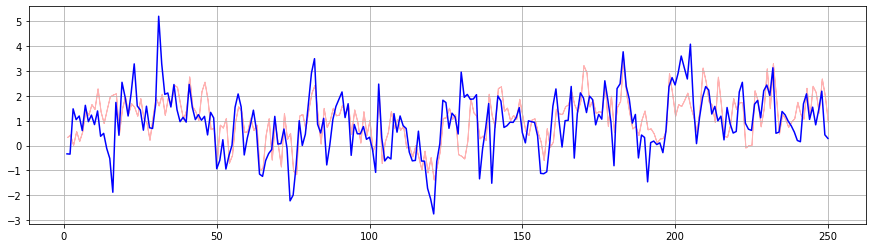

In [11]:
start = time()
logNC_airpf, _, particles_airpf = AIRPF(data, theta, potential, propagate, test_fn, A, store_paths=True)
print(round(time() - start, 1), "seconds")
plt.rcParams['figure.figsize'] = (15.0, 4.0)
CI = np.percentile(particles_airpf[:,:T,0],q=[2.5,97.5],axis=0)
plt.fill_between(np.arange(1,T+1), CI[0], CI[1], alpha=0.3, color="red")
plt.grid(True)
plt.plot(np.arange(1,T+1), X[1:], "blue");

In [12]:
logNC_bpf[-1], logNC_airpf[-1]

(-371.64681782381115, -391.00869314292413)